In [2]:
#Quant
import numpy as np
import pandas as pd
import sklearn

#Qual
import matplotlib.pyplot as plt
import seaborn as sns
from keplergl import KeplerGl
from geopy.geocoders import Nominatim
from IPython.display import Image, Markdown


#Viz set up
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
%matplotlib inline
sns.set(rc={'figure.figsize':(7,5)});

#reduce verbosity
pd.options.mode.chained_assignment = None

#Get data
original_data = pd.read_csv('./Motor_Vehicle_Collisions_-_Crashes.csv');

C:\Users\sebas\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Exploration

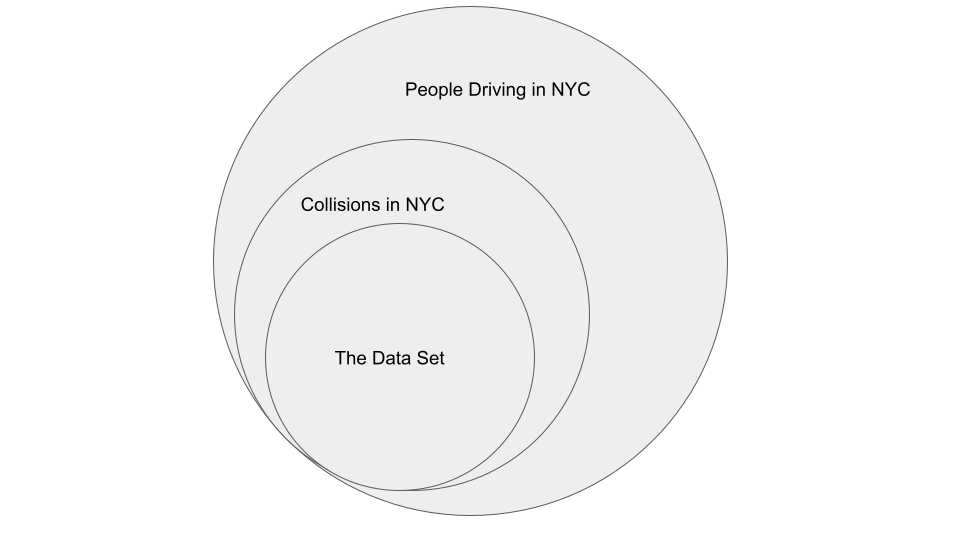

In [3]:
Image('Venn.png')

In [4]:
#display(data.iloc[1, :]) --> checking for types
#display(data['CONTRIBUTING FACTOR VEHICLE 4'].unique()) --> wasn't sure what this meant
#data['COLLISION_ID'].unique() --> same as above
#original_data.columns --> checking all the fields
#original_data['ZIP CODE'].unique() --> Found that there were entries with '     ' for their zipcodes

original_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,08/09/2015,12:03,BROOKLYN,11233,40.685072,-73.914914,"(40.6850718, -73.914914)",BOYLAND STREET,MACON STREET,NaN,...,Unspecified,NaN,NaN,NaN,3274828,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,07/29/2015,13:15,BROOKLYN,11221,40.690265,-73.915452,"(40.6902653, -73.9154519)",EVERGREEN AVENUE,CORNELIA STREET,NaN,...,Unspecified,NaN,NaN,NaN,3267181,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,08/09/2015,12:10,BROOKLYN,11206,40.696986,-73.935224,"(40.6969863, -73.9352238)",BROADWAY,MYRTLE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3274238,OTHER,OTHER,NaN,NaN,NaN
3,07/18/2015,1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other Vehicular,NaN,NaN,NaN,3261320,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
4,07/28/2015,14:15,BROOKLYN,11228,40.624474,-74.006679,"(40.6244735, -74.0066788)",12 AVENUE,70 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3266445,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


# Standardizing

In [5]:
#Create copy of original data and make missing values uniform
cleaned_data = original_data.copy()
cleaned_data = cleaned_data.drop('LOCATION', axis='columns') #Dropping due to redundancy
cleaned_data = cleaned_data.replace({'nan' : np.nan, '     ' : np.nan})

#Identify column types for later use
string_cols = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
int_cols = ['ZIP CODE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']
float_cols = ['LATITUDE', 'LONGITUDE']

In [6]:
#Fill NaN's with appropriate values
cleaned_data[string_cols] = cleaned_data[string_cols].fillna('Unspecified')
cleaned_data[float_cols] = cleaned_data[float_cols].fillna(0.0)
cleaned_data[int_cols] = cleaned_data[int_cols].fillna(0)

#Enforce field types
cleaned_data[string_cols] = cleaned_data[string_cols].astype(str)
cleaned_data[float_cols] = cleaned_data[float_cols].astype(float)
cleaned_data[int_cols] = cleaned_data[int_cols].astype(int)

In [7]:
cleaned_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,08/09/2015,12:03,BROOKLYN,11233,40.685072,-73.914914,BOYLAND STREET,MACON STREET,Unspecified,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3274828,PASSENGER VEHICLE,PASSENGER VEHICLE,Unspecified,Unspecified,Unspecified
1,07/29/2015,13:15,BROOKLYN,11221,40.690265,-73.915452,EVERGREEN AVENUE,CORNELIA STREET,Unspecified,2,...,Unspecified,Unspecified,Unspecified,Unspecified,3267181,PASSENGER VEHICLE,PASSENGER VEHICLE,Unspecified,Unspecified,Unspecified
2,08/09/2015,12:10,BROOKLYN,11206,40.696986,-73.935224,BROADWAY,MYRTLE AVENUE,Unspecified,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3274238,OTHER,OTHER,Unspecified,Unspecified,Unspecified
3,07/18/2015,1:00,Unspecified,0,0.000000,0.000000,Unspecified,Unspecified,Unspecified,2,...,Other Vehicular,Unspecified,Unspecified,Unspecified,3261320,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,Unspecified,Unspecified,Unspecified
4,07/28/2015,14:15,BROOKLYN,11228,40.624474,-74.006679,12 AVENUE,70 STREET,Unspecified,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3266445,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unspecified,Unspecified,Unspecified


# Preliminary Questions

At this point in my EDA, I believe that the most promising relationships that can be drawn from these data is in terms of location as it relates to accidents, the time of day of occurrence, as well as the consequence of the accident. The first things that I would like to know based on these data are: what do the raw injury and death quantities look like? What is the most common location for accidents to occur? At what time of day are accidents most likely to happen? 

In [8]:
#Select relevant fields
selected_data = cleaned_data[['COLLISION_ID', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']]

#Convert times to floats
selected_data['HOUR'] = selected_data.loc[:, 'CRASH TIME'].str.split(':').apply(lambda x: float(x[0]) + (float(x[1])/60)).astype(float)

#Add column for sum of injuries and death. Found that Number of Persons Injured and Number of Person Injured are linear combinations of other columns
selected_data['TOTAL DEATH AND INJURY'] = selected_data['NUMBER OF PERSONS INJURED'] + selected_data['NUMBER OF PERSONS KILLED']

#Series of number of deaths and injury. Includes totals
injury_and_death = selected_data.iloc[:, 10:16].sum(axis='index')

selected_data.head()

,COLLISION_ID,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,HOUR,TOTAL DEATH AND INJURY
0,3274828,12:03,BROOKLYN,11233,40.685072,-73.914914,BOYLAND STREET,MACON STREET,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,PASSENGER VEHICLE,12.050000,0
1,3267181,13:15,BROOKLYN,11221,40.690265,-73.915452,EVERGREEN AVENUE,CORNELIA STREET,2,0,0,0,0,0,2,0,PASSENGER VEHICLE,PASSENGER VEHICLE,13.250000,2
2,3274238,12:10,BROOKLYN,11206,40.696986,-73.935224,BROADWAY,MYRTLE AVENUE,0,0,0,0,0,0,0,0,OTHER,OTHER,12.166667,0
3,3261320,1:00,Unspecified,0,0.000000,0.000000,Unspecified,Unspecified,2,0,0,0,0,0,2,0,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,1.000000,2
4,3266445,14:15,BROOKLYN,11228,40.624474,-74.006679,12 AVENUE,70 STREET,0,0,0,0,0,0,0,0,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,14.250000,0


### Collision Consequence: None, Injury or Fatality

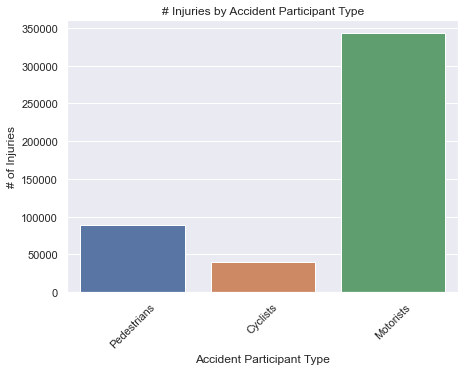

In [9]:
#Plot number of Injuries by type of person
i_tot = injury_and_death[np.r_[0, 2, 4]]
i_bar = sns.barplot(x = i_tot.index, y = (i_tot.values))
i_bar.set_xticklabels(labels = ['Pedestrians', 'Cyclists', 'Motorists'], rotation = 45);

#Set title and labels
plt.title('# Injuries by Accident Participant Type')
plt.xlabel('Accident Participant Type')
plt.ylabel('# of Injuries');

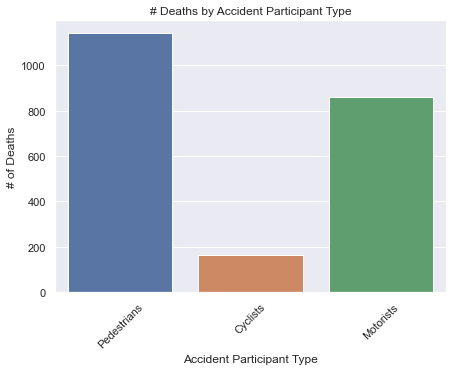

In [10]:
#Plot number of Deaths by type of person
d_tot = injury_and_death[np.r_[1, 3, 5]]
d_bar = sns.barplot(x = d_tot.index, y = (d_tot.values))
d_bar.set_xticklabels(labels = ['Pedestrians', 'Cyclists', 'Motorists'], rotation = 45);

#Set title and labels
plt.title('# Deaths by Accident Participant Type')
plt.xlabel('Accident Participant Type')
plt.ylabel('# of Deaths');

### Distribution Throughout the Day

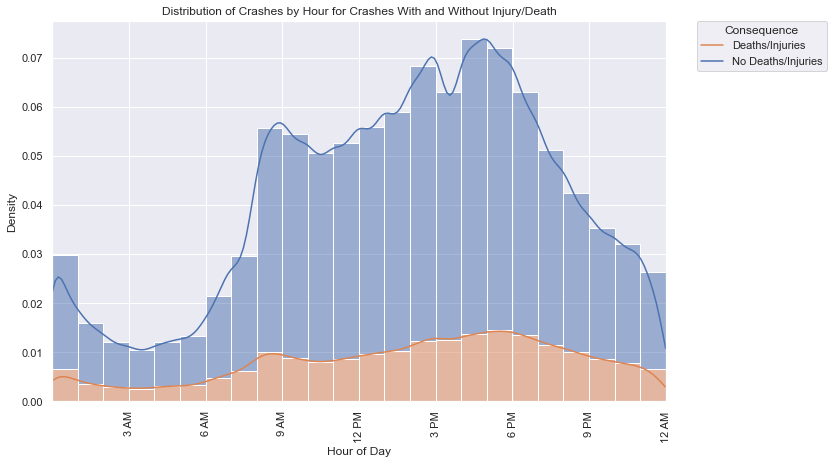

In [11]:
import matplotlib.ticker as ticker
sns.set(rc={'figure.figsize':(11,7)});

#Distribution of crashes by hour of day with bins
time_dist = sns.histplot(data=selected_data, x='HOUR', kde=True, bins = 24, stat='density',
                         multiple = 'stack', hue=selected_data['TOTAL DEATH AND INJURY'] > 0, pmax = .95);

#Display with correct labels and title
plt.title('Distribution of Crashes by Hour for Crashes With and Without Injury/Death');
plt.xlabel('Hour of Day')
plt.xlim(left = 0, right = 24)

#Set X labels
time_dist.set_xticks(range(1,25))
times = [str(x + 1) + ' AM' if x < 12 else str(x - 11) + ' PM' for x in range(0, 24)];
times[11] = '12 PM'
times[23] = '12 AM'
time_dist.set_xticklabels(times, rotation = 90);
time_dist.xaxis.set_major_locator(ticker.MultipleLocator(3))

#Set legend and plot size
plt.legend(title='Consequence', labels=['Deaths/Injuries', 'No Deaths/Injuries'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [12]:
proportion_of_injury = sum(selected_data['TOTAL DEATH AND INJURY'] > 0) / len(selected_data['TOTAL DEATH AND INJURY'] > 0)

proportion_of_death = sum(selected_data['NUMBER OF PERSONS KILLED'] > 0) / len(selected_data['NUMBER OF PERSONS KILLED'] > 0)

print('Proportion of harmless collisions: ' + str(1 - (proportion_of_injury + proportion_of_death)))
print('Proportion of collisions resulting in Injury: ' + str(proportion_of_injury))
print('Proportion of collisions resulting in Death: ' + str(proportion_of_death))

Proportion of harmless collisions: 0.7987116848710363
Proportion of collisions resulting in Injury: 0.20009302453939054
Proportion of collisions resulting in Death: 0.0011952905895732024


### Collision Hotspots

In [13]:
map_1 = KeplerGl()

config_for_borough = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "i1djeac",
          "type": "point",
          "config": {
            "dataId": "Crashes",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "snmgseh9",
          "type": "hexagon",
          "config": {
            "dataId": "Crashes",
            "label": "400m  Radius",
            "color": [
              231,
              159,
              213
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.32,
              "worldUnitSize": 0.4,
              "resolution": 8,
              "colorRange": {
                "name": "ColorBrewer YlOrRd-6",
                "type": "sequential",
                "category": "ColorBrewer",
                "colors": [
                  "#ffffb2",
                  "#fed976",
                  "#feb24c",
                  "#fd8d3c",
                  "#f03b20",
                  "#bd0026"
                ]
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 99,
              "colorAggregation": "mode",
              "sizeAggregation": "count",
              "enable3d": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "BOROUGH",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Crashes": [
              {
                "name": "LATITUDE",
                "format": None
              },
              {
                "name": "LONGITUDE",
                "format": None
              },
              {
                "name": "BOROUGH",
                "format": None
              },
              {
                "name": "ZIP CODE",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": True
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": -0.4921875,
      "dragRotate": True,
      "latitude": 40.704115223280105,
      "longitude": -73.9130253412256,
      "pitch": 57.552403777364425,
      "zoom": 11.382924084118557,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

config_for_collision = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "i1djeac",
          "type": "point",
          "config": {
            "dataId": "Crashes",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "snmgseh9",
          "type": "hexagon",
          "config": {
            "dataId": "Crashes",
            "label": "400m  Radius",
            "color": [
              231,
              159,
              213
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.63,
              "worldUnitSize": 0.4,
              "resolution": 8,
              "colorRange": {
                "name": "ColorBrewer YlOrRd-6",
                "type": "sequential",
                "category": "ColorBrewer",
                "colors": [
                  "#ffffb2",
                  "#fed976",
                  "#feb24c",
                  "#fd8d3c",
                  "#f03b20",
                  "#bd0026"
                ]
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 99,
              "colorAggregation": "minimum",
              "sizeAggregation": "count",
              "enable3d": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "COLLISION_ID",
              "type": "integer"
            },
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Crashes": [
              {
                "name": "LATITUDE",
                "format": None
              },
              {
                "name": "LONGITUDE",
                "format": None
              },
              {
                "name": "BOROUGH",
                "format": None
              },
              {
                "name": "ZIP CODE",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": True
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": -0.4921875,
      "dragRotate": True,
      "latitude": 40.73623797701036,
      "longitude": -73.95916957480603,
      "pitch": 57.552403777364425,
      "zoom": 12.019467247805874,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

config_for_zip = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "i1djeac",
          "type": "point",
          "config": {
            "dataId": "Crashes",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "snmgseh9",
          "type": "hexagon",
          "config": {
            "dataId": "Crashes",
            "label": "400m  Radius",
            "color": [
              231,
              159,
              213
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.32,
              "worldUnitSize": 0.4,
              "resolution": 8,
              "colorRange": {
                "name": "Uber Viz Qualitative 1.2",
                "type": "qualitative",
                "category": "Uber",
                "colors": [
                  "#12939A",
                  "#DDB27C",
                  "#88572C",
                  "#FF991F",
                  "#F15C17",
                  "#223F9A"
                ]
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 99,
              "colorAggregation": "maximum",
              "sizeAggregation": "count",
              "enable3d": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "ZIP CODE",
              "type": "integer"
            },
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Crashes": [
              {
                "name": "LATITUDE",
                "format": None
              },
              {
                "name": "LONGITUDE",
                "format": None
              },
              {
                "name": "BOROUGH",
                "format": None
              },
              {
                "name": "ZIP CODE",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": True
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": -0.4921875,
      "dragRotate": True,
      "latitude": 40.78676521591533,
      "longitude": -73.97504719278533,
      "pitch": 57.552403777364425,
      "zoom": 11.382924084118557,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

config_for_hi_res = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "i1djeac",
          "type": "point",
          "config": {
            "dataId": "Crashes",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "snmgseh9",
          "type": "hexagon",
          "config": {
            "dataId": "Crashes",
            "label": "400m  Radius",
            "color": [
              231,
              159,
              213
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.62,
              "worldUnitSize": 0.02,
              "resolution": 8,
              "colorRange": {
                "name": "Uber Viz Qualitative 1.2",
                "type": "qualitative",
                "category": "Uber",
                "colors": [
                  "#12939A",
                  "#DDB27C",
                  "#88572C",
                  "#FF991F",
                  "#F15C17",
                  "#223F9A"
                ]
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 100,
              "colorAggregation": "mode",
              "sizeAggregation": "count",
              "enable3d": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "BOROUGH",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Crashes": [
              {
                "name": "LATITUDE",
                "format": None
              },
              {
                "name": "LONGITUDE",
                "format": None
              },
              {
                "name": "BOROUGH",
                "format": None
              },
              {
                "name": "ZIP CODE",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": True
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": -19.961575255102044,
      "dragRotate": True,
      "latitude": 40.724622540038354,
      "longitude": -74.00557765049089,
      "pitch": 34.1581273380246,
      "zoom": 14.012932122913885,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

config_for_holland_tunnel_view = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "i1djeac",
          "type": "point",
          "config": {
            "dataId": "Crashes",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "snmgseh9",
          "type": "hexagon",
          "config": {
            "dataId": "Crashes",
            "label": "400m  Radius",
            "color": [
              231,
              159,
              213
            ],
            "columns": {
              "lat": "LATITUDE",
              "lng": "LONGITUDE"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.62,
              "worldUnitSize": 0.02,
              "resolution": 8,
              "colorRange": {
                "name": "Uber Viz Qualitative 1.2",
                "type": "qualitative",
                "category": "Uber",
                "colors": [
                  "#12939A",
                  "#DDB27C",
                  "#88572C",
                  "#FF991F",
                  "#F15C17",
                  "#223F9A"
                ]
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 100,
              "colorAggregation": "mode",
              "sizeAggregation": "count",
              "enable3d": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "BOROUGH",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Crashes": [
              {
                "name": "LATITUDE",
                "format": None
              },
              {
                "name": "LONGITUDE",
                "format": None
              },
              {
                "name": "BOROUGH",
                "format": None
              },
              {
                "name": "ZIP CODE",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": True
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": -129.4309630102041,
      "dragRotate": True,
      "latitude": 40.71908289357098,
      "longitude": -74.00315404631364,
      "pitch": 60,
      "zoom": 14.012932122913885,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

data_to_map = selected_data[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'ZIP CODE', 'COLLISION_ID', 'HOUR']]

#Considering all data
#map_1.add_data(data=data_to_map], name='Crashes')

#Considering only peak hours
map_1.add_data(data=data_to_map[(data_to_map['HOUR'] > 8) & (data_to_map['HOUR'] < 18)], name='Crashes')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [14]:
map_1.config = config_for_holland_tunnel_view
map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'i1djeac', 'type': …

In [39]:
#A point in the the most common collision 400m radius
topx = 40.695732
topy = -73.984694

#Columbus Circle
col_circlex = 40.768237
col_circley = -73.982026

#Top 2, lincoln tunnel
x = 40.759471
y = -73.999214

#Queensboro Bridge
x = 40.760489
y = -73.964211

#Twotoone refers to brooklyn side right off of brooklyn bridge

x = 40.759291
y = -73.999458

geolocator = Nominatim(user_agent="find_dangerous_streets")
location = geolocator.reverse(str(x) + ', ' + str(y))
l = pd.DataFrame(location.address.split(','))
l.columns = ['Entry']
#l.index = ['Address #', 'Street/Ave Name', 'Neighborhood', 'Burrough', 'County', 'City', 'District', 'State', 'Zip Code', ]
print(location.address)
l

11th Avenue, Hudson Yards, Manhattan Community Board 4, Manhattan, New York County, New York, Stone Street Historic District, New York, 10018, United States


,Entry
0,11th Avenue
1,Hudson Yards
2,Manhattan Community Board 4
3,Manhattan
4,New York County
5,New York
6,Stone Street Historic District
7,New York
8,10018
9,United States


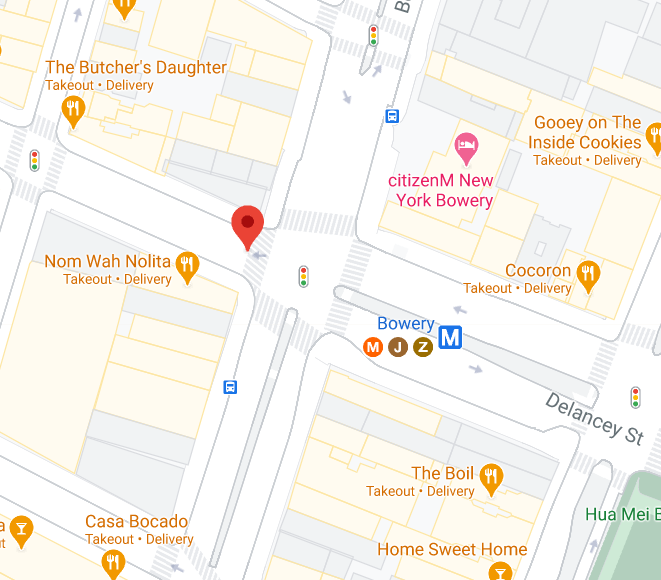

In [41]:
Image('twotoone.png')

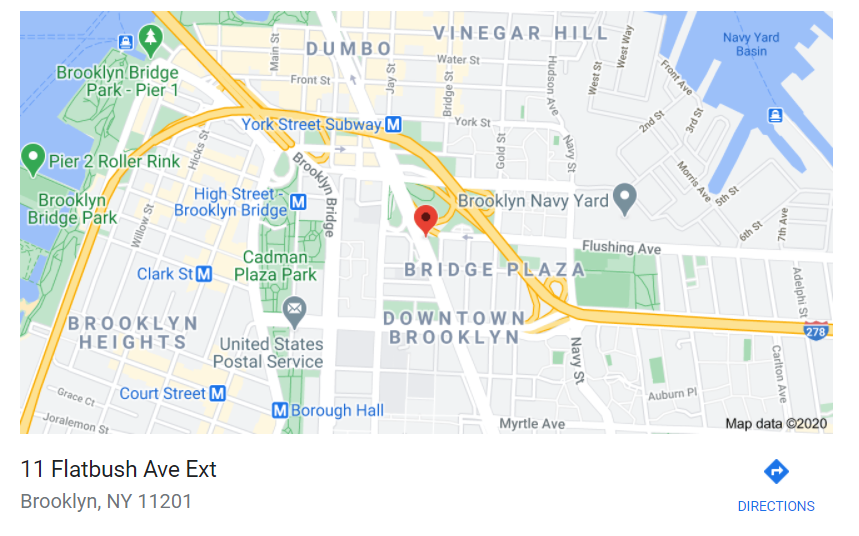

In [42]:
Image('toptop.png')

# Preliminary Hypothesis and Interpretations

Based on the visualizations above, it appears that the bulk of collisions occur in Manhattan during prime commuting hours, and most likely result in no injury or death, followed by some injury and least likely, death. Given this, I wonder how we might be able to use this data to create a reasonably accurate model for the following scenario.
Given the available information from a 9/11 call (intuitively, location and time of day), I propose the following model:

    probability of death or injury in a collision = theta0 + theta1*latitude + theta2*longitude + theta3*hour


In [15]:
emergency_call_data_full = selected_data[['LATITUDE', 'LONGITUDE', 'HOUR', 'TOTAL DEATH AND INJURY']]
emergency_call_data_full['TOTAL DEATH AND INJURY'] = (emergency_call_data_full['TOTAL DEATH AND INJURY'] > 0).astype(int)
emergency_call_data_full
emergency_call_data_full

,LATITUDE,LONGITUDE,HOUR,TOTAL DEATH AND INJURY
0,40.685072,-73.914914,12.050000,0
1,40.690265,-73.915452,13.250000,1
2,40.696986,-73.935224,12.166667,0
3,0.000000,0.000000,1.000000,1
4,40.624474,-74.006679,14.250000,0
...,...,...,...,...
1739321,40.816766,-73.864748,19.900000,0
1739322,40.801665,-73.913223,18.666667,0
1739323,40.679516,-73.911081,16.500000,0
1739324,40.729799,-73.974801,7.083333,0


In [16]:
from sklearn.model_selection import train_test_split

#create train/val split
train, val = train_test_split(emergency_call_data_full, test_size=0.1, random_state=42)

#split training data
xtrain = train.iloc[:, :3]
ytrain = train.iloc[:, 3]
ytrain = ytrain.values.ravel()

In [17]:
#Cross validation
from sklearn.model_selection import KFold

def compute_cv_scores(model, xtrain, ytrain):

    kf = KFold(n_splits=4)
    accuracies = []
    precisions = []
    recalls = []
    
    for train_idx, valid_idx in kf.split(xtrain):
        # split the data
        split_xtrain, split_X_valid = xtrain.iloc[train_idx, :], xtrain.iloc[valid_idx, :]
        split_ytrain, split_Y_valid = ytrain[train_idx], ytrain[valid_idx]

        # Fit the model on the cv split
        model.fit(split_xtrain, split_ytrain)
        
        # Compute CV predictions
        ytrain_pred = model.predict(xtrain)
        ytrain_pred

        cv_accuracy = sklearn.metrics.accuracy_score(ytrain, ytrain_pred)
        cv_precision = sklearn.metrics.precision_score(ytrain, ytrain_pred)
        cv_recall = sklearn.metrics.recall_score(ytrain, ytrain_pred)
                
        accuracies.append(cv_accuracy)
        precisions.append(cv_precision)
        recalls.append(cv_recall)
    
    accuracy_mean = np.mean(accuracies)
    
    if len(precisions) == 0:
        precision_mean = -50000
    else:
        precision_mean = np.mean(precisions)
    
    if len(recalls) == 0:
        recall_means = -50000
    else:
        recall_mean = np.mean(recalls)
    
    return [accuracy_mean, precision_mean, recall_mean]

In [26]:
from sklearn.linear_model import LogisticRegression

#Implemented due to sklearn warnings for dividing by 0's since some iterations did not predict and 1's
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

minimizing_weight = {0 : 0.26202051177583796, 1 : 1}
#minimizing_weight = {0 : 0.2, 1 : .8}


model = LogisticRegression(class_weight = minimizing_weight)

results = compute_cv_scores(model, xtrain, ytrain)

print('Cross Validated Accuracy Score: ', results[0])
print('Cross Validated Precision Score: ', results[1])
print('Cross Validated Recall Score: ', results[2])


Cross Validated Accuracy Score:  0.6835146190126058
Cross Validated Precision Score:  0.2364627208994215
Cross Validated Recall Score:  0.2604649938417751


In [19]:
#def min_weight(w):
#    model = LogisticRegression(C=.5, class_weight = {0 : w, 1: 1})
#    metric_list = compute_cv_scores(model, xtrain, ytrain)
#    return -1 * sum(metric_list)

In [21]:
#from scipy.optimize import minimize 


#minimizing_weight = minimize(min_weight, x0 = .262)
#minimizing_weight

# Model Recap and Next Steps

Issues:

    1. The training set was severly imbalanced, which incentivizes the model to always predict 0.
        a. Despite altering the regularization parameter, which resulted in a more balanced prediction, it is useless as is
    2. Since there are multiple hot spots, latitude and longitude alone does not necessarily capture the common qualities
    3. In general, these three parameters are not enough to go off of for a reasonable prediction.
        a. Aka, the concept of predicting death or injury based only on the information present in a 911 call may be a fools 
        errand
        
        
Resolutions:

    1. Potentially one hot encode either:
        a. Presence on an avenue, street and cross street, or proximity to bridge/tunnel/off ramp
    2. Adopt a Random Forest as opposed to linear regression to manage the complexity of all these features
    3. Consider further features in the data set such as vehicle type codes
    4. After implementing these, check on the test data.
    
    